# Scania Trucks APS Failure Prediction using Machine Learning

## Project By :
### Hrishikesh Shinde
### Pratik Kanase


##### Data Source : www.kaggle.com
##### Author : UCI ML Repository


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Importing Data

In [2]:
#importing data
data=pd.read_csv(r"C:\Users\Hp\Desktop\New folder\aps_failure_training_set.csv")
data.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733.0,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439.0,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,120960

### Getting information about Dataset

In [3]:
#Importing methods from predefined class
from dataset_information import Dataset_inspection

#calling the method
Dataset_inspection(data).dataset_info()


Shape of Dataset (60000, 171)

Number of Rows 60000 
Number of Columns:  171

Feature Names : 
 ['class' 'aa_000' 'ab_000' 'ac_000' 'ad_000' 'ae_000' 'af_000' 'ag_000'
 'ag_001' 'ag_002' 'ag_003' 'ag_004' 'ag_005' 'ag_006' 'ag_007' 'ag_008'
 'ag_009' 'ah_000' 'ai_000' 'aj_000' 'ak_000' 'al_000' 'am_0' 'an_000'
 'ao_000' 'ap_000' 'aq_000' 'ar_000' 'as_000' 'at_000' 'au_000' 'av_000'
 'ax_000' 'ay_000' 'ay_001' 'ay_002' 'ay_003' 'ay_004' 'ay_005' 'ay_006'
 'ay_007' 'ay_008' 'ay_009' 'az_000' 'az_001' 'az_002' 'az_003' 'az_004'
 'az_005' 'az_006' 'az_007' 'az_008' 'az_009' 'ba_000' 'ba_001' 'ba_002'
 'ba_003' 'ba_004' 'ba_005' 'ba_006' 'ba_007' 'ba_008' 'ba_009' 'bb_000'
 'bc_000' 'bd_000' 'be_000' 'bf_000' 'bg_000' 'bh_000' 'bi_000' 'bj_000'
 'bk_000' 'bl_000' 'bm_000' 'bn_000' 'bo_000' 'bp_000' 'bq_000' 'br_000'
 'bs_000' 'bt_000' 'bu_000' 'bv_000' 'bx_000' 'by_000' 'bz_000' 'ca_000'
 'cb_000' 'cc_000' 'cd_000' 'ce_000' 'cf_000' 'cg_000' 'ch_000' 'ci_000'
 'cj_000' 'ck_000' 'cl_000' 'c

### Missing Data Analysis and Imputation

In [4]:
#seperating the taeget feature
X = data.drop(['class'],axis=1)
y = data[['class']]

any missing data in dataset: True 
 
 columnwise missing data :
        total_missing_count  percentage_missing datatype
ab_000                46329           77.215000   object
ac_000                 3335            5.558333   object
ad_000                14861           24.768333   object
ae_000                 2500            4.166667   object
af_000                 2500            4.166667   object
ag_000                  671            1.118333   object
ag_001                  671            1.118333   object
ag_002                  671            1.118333   object
ag_003                  671            1.118333   object
ag_004                  671            1.118333   object
ag_005                  671            1.118333   object
ag_006                  671            1.118333   object
ag_007                  671            1.118333   object
ag_008                  671            1.118333   object
ag_009                  671            1.118333   object
ah_000                  


 
 Total percentage of missing data : 8.333480392156863  % 


 total percentage of rows affected by missing data : 99.015 % 



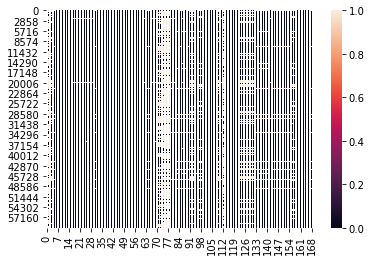

In [5]:
#Missing Data Analysis
X.replace('na',np.NaN, inplace=True)

#Missing Data Analysis
def missing_data_analysis(data):
    print('any missing data in dataset:',data.isnull().values.any(),'\n','\n','columnwise missing data :')
    
    missing_data=pd.DataFrame({'total_missing_count':data.isnull().sum(),
                           'percentage_missing':data.isnull().sum()/data.shape[0]*100,
                           'datatype':data.dtypes
                          })

    
    print(missing_data[missing_data.total_missing_count>0])
    sns.heatmap(data.isnull().values)



    #Counting cells with missing values:(Total number of NA)
    a=sum(data.isnull().values.ravel())
    #Getting total number of cells
    b=np.prod(data.shape)
    #Getting percentage of NA in overall data
    print('\n','\n','Total percentage of missing data :',(a/b)*100,' % \n')


    #Calculating Rows affected by NA- Rows having na/ Total number of rows

    #Counting rows that have missing values somewhere:
    a=sum([True for idx,row in data.iterrows() if any(row.isnull())])
    #Total Number of rows in data
    b=data.shape[0]
    print('\n','total percentage of rows affected by missing data :',(a/b)*100,'% \n')

    
#calling the function
missing_data_analysis(X)

In [6]:
#Removing features having missing values more than 60%

X=X.dropna(thresh=data.shape[0]*0.6,how='all',axis=1)


In [7]:
#Analyzining the classes in target feature

y['class'].unique()

array(['neg', 'pos'], dtype=object)

In [8]:
#most of the fetures are in object datatype
# we need to convert all the data to numeric format
# Encoding the classes
y = y['class'].map({'neg': 0, 'pos': 1})

In [9]:
#Converting datatypes from object to numeric 
X=X.apply(pd.to_numeric)
X.dtypes

aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
af_000    float64
ag_000    float64
ag_001    float64
ag_002    float64
ag_003    float64
ag_004    float64
ag_005    float64
ag_006    float64
ag_007    float64
ag_008    float64
ag_009    float64
ah_000    float64
ai_000    float64
aj_000    float64
ak_000    float64
al_000    float64
am_0      float64
an_000    float64
ao_000    float64
ap_000    float64
aq_000    float64
ar_000    float64
as_000    float64
at_000    float64
au_000    float64
av_000    float64
ax_000    float64
ay_000    float64
ay_001    float64
ay_002    float64
ay_003    float64
ay_004    float64
ay_005    float64
ay_006    float64
ay_007    float64
ay_008    float64
ay_009    float64
az_000    float64
az_001    float64
az_002    float64
az_003    float64
az_004    float64
az_005    float64
az_006    float64
az_007    float64
az_008    float64
az_009    float64
ba_000    float64
ba_001    float64
ba_002    float64
ba_003    float64
ba_004    

any missing data in dataset: False 
 
 columnwise missing data :
Empty DataFrame
Columns: [total_missing_count, percentage_missing, datatype]
Index: []

 
 Total percentage of missing data : 0.0  % 


 total percentage of rows affected by missing data : 0.0 % 



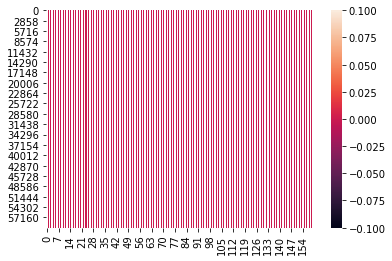

In [10]:
#Imputing the missing data
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X=imp.transform(X)
X=pd.DataFrame(X)


#checking the data is imputed or not
missing_data_analysis(X)

In [11]:
#checking the distribution of data
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160
count,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.0,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,4.370966e+05,1.108374e+06,1.657818e+06,4.993098e+05,3.556989e+04,5.114753e+03,1.809931e+06,9.016965e+03,1.143675e+03,9.794900e+02,5.913048e+04,9.328133e+04,3.461037e+06,3.002440e+06,1.004160e+06,4.424045e+05,0.496918,1.267365e+02,5.072046e+03,2.305804e+02,1117.825913,374.327380,1.221165e+04,1.019012e+04,1.097500e+04,7.225784e+03,1.056600e+04,1.119791e+05,1.078551e+06,1.546032e+06,1.051123e+06,1.162622e+03,7.849608e+03,4.420992e+03,8.066082e+03,8.724082e+04,1.476897e+06,2.135584e+06,1.018943e+05,1.737782e+04,6.617861e+02,42.073455,1.399652e+06,8.941175e+05,4.130969e+05,2.740070e+05,2.048756e+05,1.889412e+05,2.106288e+05,1.857874e+05,3.588284e+04,3.576672e+04,4.526177e+06,569.526565,921.775461,1372.646086,74.878261,1.809431e+06,5.794308e+04,4.922076e+05,5.100892e+05,2.804291e+05,8.036055e+04,5.941650e+04,4.515325e+06,4.515325e+06,4.112218e+06,2.202893e+04,1.019608e+05,39168.817123,4.056381e+05,3.803444e+06,1209600.0,6.434356e+04,1.902218e+05,91.520415,0.000443,3.481204e+06,1.028419e+05,7.143427e+05,343.018812,343.102847,2.336674e+03,2.195149e+04,1.610509e+05,5.314780e+05,1.282835e+06,1.341059e+06,4.105641e+05,6.442513e+04,1.922679e+04,7.820467e+03,1.905156e+05,570.404288,4.515325e+06,5479.857073,788.425545,2.388106e+05,3.553731e+05,4.4422

Percentage of datapoints present in class : 

 0    98.333333
1     1.666667
Name: class, dtype: float64


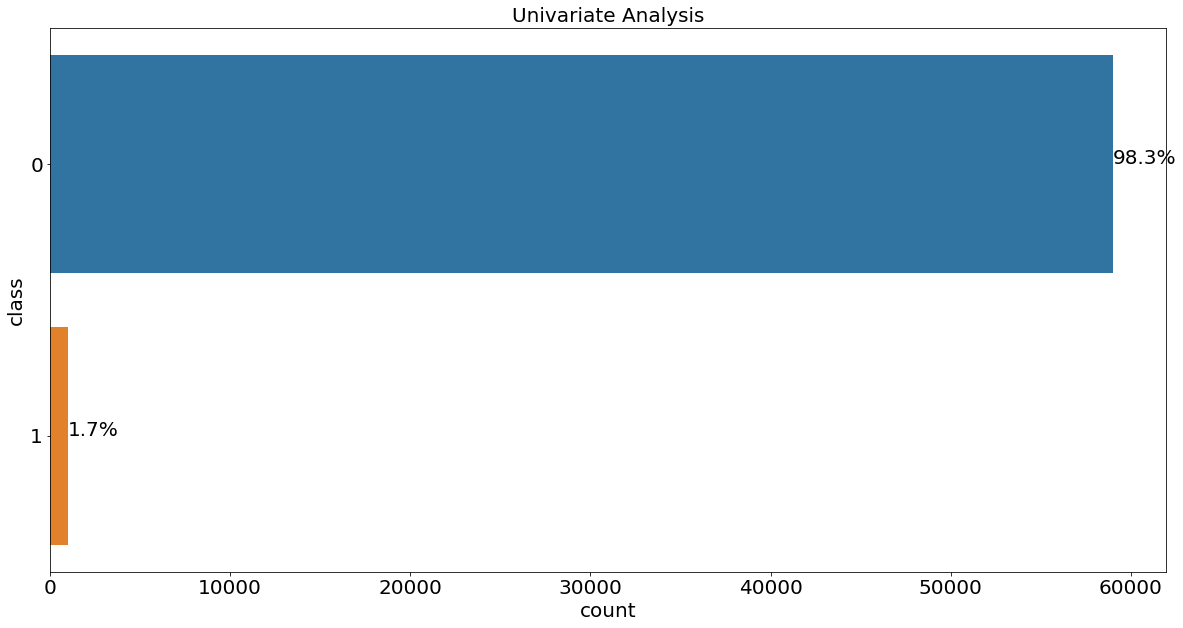

In [12]:
def univariate_analysis_categorical_countplot(data,label):
    plt.figure(figsize=(20,10))
    ax=sns.countplot(y=data[label],data=data,order = data[label].value_counts().index)
    ax.axes.set_title('Univariate Analysis',fontsize=20)
    ax.set_ylabel(label,fontsize=20)
    ax.set_xlabel('count',fontsize=20)
    ax.tick_params(labelsize=20)
    
    total = len(data[label])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=20)
    
    print('Percentage of datapoints present in class : \n\n',(data[label].value_counts()/data[label].count())*100)
        
    plt.show()


#univariate analysis of cateforical features
univariate_analysis_categorical_countplot(pd.DataFrame(y),'class')

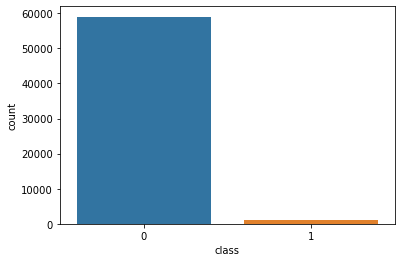

In [13]:

#plotting bar plot to check class imbalance
import seaborn as sns
sns.countplot(y)

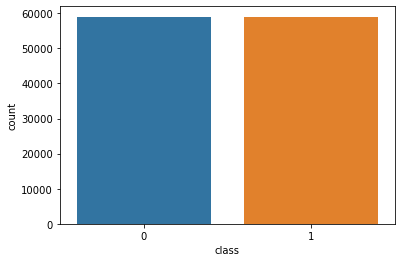

In [15]:
#Treating the class imbalance
from imblearn.over_sampling import SMOTE
sample = SMOTE()
X_bal,y_bal = sample.fit_resample(X,y)
sns.countplot(y_bal)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 / 3)

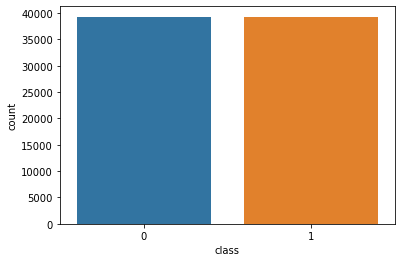

In [15]:
from imblearn.over_sampling import SMOTE

sample = SMOTE()
X_bal, y_bal = sample.fit_resample(x_train, y_train)
sns.countplot(y_bal)

In [16]:
# Scaling the data using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_bal)
X_scaled_test = scaler.transform(x_test)

In [17]:
X_scaled_train = pd.DataFrame(X_scaled_train, columns=X_bal.columns, index=X_bal.index)
X_scaled_test = pd.DataFrame(X_scaled_test, columns=x_test.columns, index=x_test.index)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

Confusion Matrix:  
 [[19484   203]
 [   95   218]] 
 

Accuracy Score:
 0.9851 
 

Precision: 
 0.9896886270127495 
 

Recall:  0.9951478625057459 
 

F1_Score: 
 0.9924107370243975 
 

roc_auc_score: 
 0.8430871250079721 
 



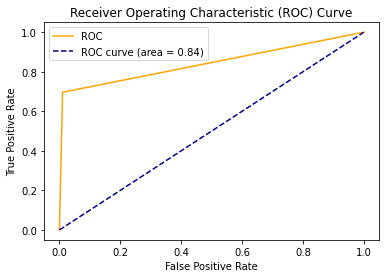

In [19]:
# Using decision tree without hyperparameter tuning

clf = DecisionTreeClassifier()
clf.fit(X_scaled_train, y_bal)
y_pred = clf.predict(X_scaled_test)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:  \n", conf_mat, "\n \n")

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
print("roc_auc_score: \n", auc, "\n \n")

import matplotlib.pyplot as plt

# Area Under Curve


plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [20]:
# Using grid search cv
from sklearn.model_selection import train_test_split, GridSearchCV

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3]}

In [21]:


grid_search = GridSearchCV(estimator=clf, param_grid=grid_param, cv=3, n_jobs=-1)

grid_search.fit(X_scaled_train, y_bal)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]})

In [22]:


# getting the best parameters
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}


Confusion Matrix:  
 [[19025   662]
 [   44   269]] 
 

Accuracy Score:
 0.9647 
 

Precision: 
 0.9663737491745822 
 

Recall:  0.9976925900676491 
 

F1_Score: 
 0.9817834657859428 
 

roc_auc_score: 
 0.9128993346511888 
 



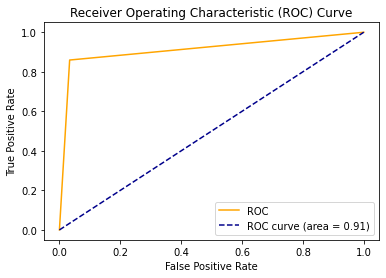

In [23]:
# Using decision tree with hyperparameter tuning

clf = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=1, min_samples_split=2)
clf.fit(X_scaled_train, y_bal)
y_pred = clf.predict(X_scaled_test)

conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:  \n", conf_mat, "\n \n")

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
print("roc_auc_score: \n", auc, "\n \n")

import matplotlib.pyplot as plt

# Area Under Curve
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Confusion Matrix:  
 [[19591    96]
 [   85   228]] 
 

Accuracy Score:
 0.99095 
 

Precision: 
 0.9951236856809061 
 

Recall:  0.9956800162634681 
 

F1_Score: 
 0.9954017732388284 
 

roc_auc_score: 
 0.8617790952366192 
 



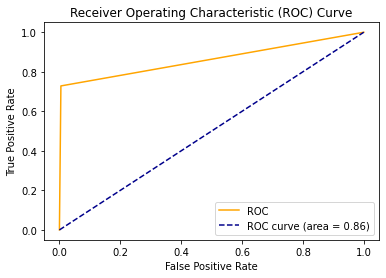

In [24]:
# trying the random forest algo
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

rand_clf = RandomForestClassifier()
rand_clf.fit(X_scaled_train, y_bal)

y_pred_rf = rand_clf.predict(X_scaled_test)

conf_mat = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:  \n", conf_mat, "\n \n")

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test, y_pred_rf)
print("roc_auc_score: \n", auc, "\n \n")

import matplotlib.pyplot as plt

# Area Under Curve

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:  
 [[19591    96]
 [   85   228]] 
 

Accuracy Score:
 0.99095 
 

Precision: 
 0.9951236856809061 
 

Recall:  0.9956800162634681 
 

F1_Score: 
 0.9954017732388284 
 

roc_auc_score: 
 0.8617790952366192 
 



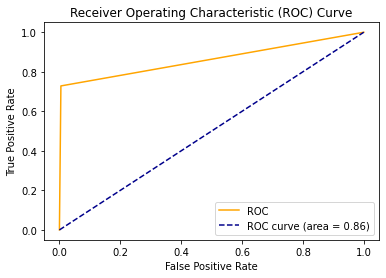

In [25]:
# logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_scaled_train, y_bal)
y_pred_log = rand_clf.predict(X_scaled_test)

conf_mat = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:  \n", conf_mat, "\n \n")

true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)

Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
print("Accuracy Score:\n", Accuracy, "\n \n")

# Precison
Precision = true_positive / (true_positive + false_positive)
print("Precision: \n", Precision, "\n \n")

# Recall
Recall = true_positive / (true_positive + false_negative)
print("Recall: ", Recall, "\n \n")

# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
print("F1_Score: \n", F1_Score, "\n \n")

# Area Under Curve
auc = roc_auc_score(y_test, y_pred_log)
print("roc_auc_score: \n", auc, "\n \n")

import matplotlib.pyplot as plt

# Area Under Curve


plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [26]:
#saving models
import pickle
# Writing different model files to file
with open( 'logistic_reg.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('rf.sav', 'wb') as f:
    pickle.dump(rand_clf,f)
     
with open('decision_tree.sav', 'wb') as f:
    pickle.dump(clf,f)